# Exploratory Data analysis

In [1]:
#Import pandas packages 
import pandas as pd

In [2]:
#reading the CSV file
dataset=open('/Users/gowthamnallathambi/Downloads/oscars-demographics.csv',errors='replace')
df = pd.read_csv(dataset)

In [3]:
#Display only 10 rows
df.head(10)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,02/10/2015 03:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,02/10/2015 02:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,02/10/2015 02:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,02/10/2015 02:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,02/10/2015 01:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN
5,670454358,False,finalized,3,02/10/2015 03:50,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,Cavalcade,Frank Lloyd,NaN,NaN,NaN,NaN
6,670454359,False,finalized,3,02/10/2015 02:07,"Bisacquino, Sicily, Italy",1.0,18-May-1897,1.0,White,...,Best Director,http://www.nndb.com/people/459/000032363/,NaN,NaN,It Happened One Night,Frank Capra,NaN,NaN,NaN,NaN
7,670454360,False,finalized,3,02/10/2015 01:46,"Cape Elizabeth, Me",1.0,1-Feb-1894,1.0,White,...,Best Director,http://www.nndb.com/people/458/000032362/,NaN,NaN,The Informer,John Ford,NaN,NaN,NaN,NaN
8,670454361,False,finalized,3,02/10/2015 01:47,"Bisacquino, Sicily, Italy",1.0,18-May-1897,1.0,White,...,Best Director,http://www.nndb.com/people/459/000032363/,NaN,NaN,Mr. Deeds Goes to Town,Frank Capra,NaN,NaN,NaN,NaN
9,670454362,False,finalized,3,02/10/2015 02:05,"Los Angeles, Ca",1.0,3-Oct-1898,1.0,White,...,Best Director,http://www.nndb.com/people/380/000044248/,NaN,NaN,The Awful Truth,Leo McCarey,NaN,NaN,NaN,NaN


In [4]:
"""
Getting the count of null values using sum of variable values.
This function will count the number of null values for each variables. 
"""
pd.isnull(df).sum()

_unit_id                           0
_golden                            0
_unit_state                        0
_trusted_judgments                 0
_last_judgment_at                 25
birthplace                         0
birthplace:confidence              0
date_of_birth                      0
date_of_birth:confidence           0
race_ethnicity                     0
race_ethnicity:confidence          0
religion                           0
religion:confidence                0
sexual_orientation                 0
sexual_orientation:confidence      0
year_of_award                      0
year_of_award:confidence           0
award                              0
biourl                             0
birthplace_gold                  432
date_of_birth_gold               433
movie                              0
person                             0
race_ethnicity_gold              439
religion_gold                    431
sexual_orientation_gold          438
year_of_award_gold               430
d

In [5]:
#creating a new dataset with the specified columns
#We need create the dummy variables inorder to extract the data fro raw variables
oscars_df= pd.DataFrame(df, columns =['birthplace', 'date_of_birth','race_ethnicity','year_of_award','award']) 

In [6]:
#getting distinct values from the column "award"
print(oscars_df['award'].unique())

['Best Director' 'Best Actor' 'Best Supporting Actor' 'Best Actress'
 'Best Supporting Actress']


In [7]:
#Converting the years with 4 digits first
oscars_df['BirthDate']=pd.to_datetime(oscars_df['date_of_birth'],errors="coerce")

In [8]:
#extracting Year from BirthDate
from datetime import datetime
oscars_df['BirthYear'] = oscars_df['BirthDate'].dt.strftime('%Y')

In [9]:
#finding the length of Date of Birth
oscars_df['ldob'] = len(oscars_df['BirthDate'])

In [10]:
#checking the columns that have categorial values
#this code will return the columns which has categorial values
import numpy as np
cat_cols=oscars_df.select_dtypes(include=[np.object]).copy()
print(cat_cols)

              birthplace date_of_birth race_ethnicity  \
0      Chisinau, Moldova   30-Sep-1895          White   
1      Glasgow, Scotland    2-Feb-1886          White   
2      Chisinau, Moldova   30-Sep-1895          White   
3            Chicago, Il   23-Feb-1899          White   
4     Salt Lake City, Ut   23-Apr-1894          White   
..                   ...           ...            ...   
436      London, England     07-Mar-71          White   
437  Manchester, England     20-Oct-56          White   
438          Chicago, Il     26-Jul-22          White   
439           Laurel, Ne     31-Aug-28          White   
440           Nevada, Mo     05-Aug-06          White   

                       award BirthYear  
0              Best Director      1895  
1              Best Director      1886  
2              Best Director      1895  
3              Best Director      1899  
4              Best Director      1894  
..                       ...       ...  
436  Best Supporting Actress

In [11]:
#applying forward fill for Na value in birthplace
oscars_df['birthplace'].fillna(method='ffill')

0        Chisinau, Moldova
1        Glasgow, Scotland
2        Chisinau, Moldova
3              Chicago, Il
4       Salt Lake City, Ut
              ...         
436        London, England
437    Manchester, England
438            Chicago, Il
439             Laurel, Ne
440             Nevada, Mo
Name: birthplace, Length: 441, dtype: object

In [12]:
oscars_df.head(10)

,birthplace,date_of_birth,race_ethnicity,year_of_award,award,BirthDate,BirthYear,ldob
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director,1895-09-30,1895,441
1,"Glasgow, Scotland",2-Feb-1886,White,1930,Best Director,1886-02-02,1886,441
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director,1895-09-30,1895,441
3,"Chicago, Il",23-Feb-1899,White,1932,Best Director,1899-02-23,1899,441
4,"Salt Lake City, Ut",23-Apr-1894,White,1933,Best Director,1894-04-23,1894,441
5,"Glasgow, Scotland",2-Feb-1886,White,1934,Best Director,1886-02-02,1886,441
6,"Bisacquino, Sicily, Italy",18-May-1897,White,1935,Best Director,1897-05-18,1897,441
7,"Cape Elizabeth, Me",1-Feb-1894,White,1936,Best Director,1894-02-01,1894,441
8,"Bisacquino, Sicily, Italy",18-May-1897,White,1937,Best Director,1897-05-18,1897,441
9,"Los Angeles, Ca",3-Oct-1898,White,1938,Best Director,1898-10-03,1898,441


In [13]:
#dropping the rows with NaN values
oscars_df.dropna()

,birthplace,date_of_birth,race_ethnicity,year_of_award,award,BirthDate,BirthYear,ldob
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director,1895-09-30,1895,441
1,"Glasgow, Scotland",2-Feb-1886,White,1930,Best Director,1886-02-02,1886,441
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director,1895-09-30,1895,441
3,"Chicago, Il",23-Feb-1899,White,1932,Best Director,1899-02-23,1899,441
4,"Salt Lake City, Ut",23-Apr-1894,White,1933,Best Director,1894-04-23,1894,441
...,...,...,...,...,...,...,...,...
436,"London, England",07-Mar-71,White,2006,Best Supporting Actress,1971-03-07,1971,441
437,"Manchester, England",20-Oct-56,White,2009,Best Director,2056-10-20,2056,441
438,"Chicago, Il",26-Jul-22,White,1977,Best Supporting Actor,2022-07-26,2022,441
439,"Laurel, Ne",31-Aug-28,White,1999,Best Supporting Actor,2028-08-31,2028,441


In [14]:
#checking the row which has NAN value in BirthYear
oscars_df[oscars_df['BirthYear'].isnull()]

,birthplace,date_of_birth,race_ethnicity,year_of_award,award,BirthDate,BirthYear,ldob
54,"Santa Monica, Ca",18-Aug-1936 [1],White,1980,Best Director,NaT,NaN,441


In [15]:
#droping the above row
oscars_df = oscars_df.drop(54) 

In [16]:
#changing the dtype to Int for BithYear
oscars_df['BirthYear']=oscars_df['BirthYear'].astype(int)

In [17]:
#getting the award age for each winner
oscars_df['award_age']=oscars_df['BirthYear']-oscars_df['year_of_award']

In [18]:
#removing the negative values
oscars_df['award_age'] = oscars_df['award_age'].abs()

In [19]:
#Dividing the City State and country
#This code will seprate the city, state and country which is grouped together
oscars_df[['city','state','country']] = oscars_df['birthplace'].str.split(',', expand=True, n=2)

In [20]:
oscars_df.head(10)

,birthplace,date_of_birth,race_ethnicity,year_of_award,award,BirthDate,BirthYear,ldob,award_age,city,state,country
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director,1895-09-30,1895,441,32,Chisinau,Moldova,None
1,"Glasgow, Scotland",2-Feb-1886,White,1930,Best Director,1886-02-02,1886,441,44,Glasgow,Scotland,None
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director,1895-09-30,1895,441,36,Chisinau,Moldova,None
3,"Chicago, Il",23-Feb-1899,White,1932,Best Director,1899-02-23,1899,441,33,Chicago,Il,None
4,"Salt Lake City, Ut",23-Apr-1894,White,1933,Best Director,1894-04-23,1894,441,39,Salt Lake City,Ut,None
5,"Glasgow, Scotland",2-Feb-1886,White,1934,Best Director,1886-02-02,1886,441,48,Glasgow,Scotland,None
6,"Bisacquino, Sicily, Italy",18-May-1897,White,1935,Best Director,1897-05-18,1897,441,38,Bisacquino,Sicily,Italy
7,"Cape Elizabeth, Me",1-Feb-1894,White,1936,Best Director,1894-02-01,1894,441,42,Cape Elizabeth,Me,None
8,"Bisacquino, Sicily, Italy",18-May-1897,White,1937,Best Director,1897-05-18,1897,441,40,Bisacquino,Sicily,Italy
9,"Los Angeles, Ca",3-Oct-1898,White,1938,Best Director,1898-10-03,1898,441,40,Los Angeles,Ca,None


In [21]:
#As all the values for state for new York city was empty we filled the empty fields with NY
oscars_df['state']=oscars_df['state'].fillna('Ny')

In [22]:
#combining the values in country and state as the values in country were less
oscars_df["country"].fillna(oscars_df["state"], inplace=True)

In [23]:
#Changing States in USA to Country name "USA"
oscars_df['country'] = oscars_df['country'].apply(lambda a: a if len(str(a))!=3 else 'USA')

In [24]:
oscars_df.head(10)

,birthplace,date_of_birth,race_ethnicity,year_of_award,award,BirthDate,BirthYear,ldob,award_age,city,state,country
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director,1895-09-30,1895,441,32,Chisinau,Moldova,Moldova
1,"Glasgow, Scotland",2-Feb-1886,White,1930,Best Director,1886-02-02,1886,441,44,Glasgow,Scotland,Scotland
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director,1895-09-30,1895,441,36,Chisinau,Moldova,Moldova
3,"Chicago, Il",23-Feb-1899,White,1932,Best Director,1899-02-23,1899,441,33,Chicago,Il,USA
4,"Salt Lake City, Ut",23-Apr-1894,White,1933,Best Director,1894-04-23,1894,441,39,Salt Lake City,Ut,USA
5,"Glasgow, Scotland",2-Feb-1886,White,1934,Best Director,1886-02-02,1886,441,48,Glasgow,Scotland,Scotland
6,"Bisacquino, Sicily, Italy",18-May-1897,White,1935,Best Director,1897-05-18,1897,441,38,Bisacquino,Sicily,Italy
7,"Cape Elizabeth, Me",1-Feb-1894,White,1936,Best Director,1894-02-01,1894,441,42,Cape Elizabeth,Me,USA
8,"Bisacquino, Sicily, Italy",18-May-1897,White,1937,Best Director,1897-05-18,1897,441,40,Bisacquino,Sicily,Italy
9,"Los Angeles, Ca",3-Oct-1898,White,1938,Best Director,1898-10-03,1898,441,40,Los Angeles,Ca,USA


In [25]:
#replacing unchanged values
oscars_df["country"].replace({"Alsace,France":"France", "Yorkshire, England": "England","Tuscany, Italy":"Italy","Ny":"USA"}, inplace=True)

In [26]:
oscars_df[oscars_df['birthplace'].isnull()]

,birthplace,date_of_birth,race_ethnicity,year_of_award,award,BirthDate,BirthYear,ldob,award_age,city,state,country


In [27]:
#Dropping Converted columns
oscars_df.drop(['birthplace','date_of_birth'], axis=1, inplace=True)


In [28]:
oscars_df.head(10)

,race_ethnicity,year_of_award,award,BirthDate,BirthYear,ldob,award_age,city,state,country
0,White,1927,Best Director,1895-09-30,1895,441,32,Chisinau,Moldova,Moldova
1,White,1930,Best Director,1886-02-02,1886,441,44,Glasgow,Scotland,Scotland
2,White,1931,Best Director,1895-09-30,1895,441,36,Chisinau,Moldova,Moldova
3,White,1932,Best Director,1899-02-23,1899,441,33,Chicago,Il,USA
4,White,1933,Best Director,1894-04-23,1894,441,39,Salt Lake City,Ut,USA
5,White,1934,Best Director,1886-02-02,1886,441,48,Glasgow,Scotland,Scotland
6,White,1935,Best Director,1897-05-18,1897,441,38,Bisacquino,Sicily,Italy
7,White,1936,Best Director,1894-02-01,1894,441,42,Cape Elizabeth,Me,USA
8,White,1937,Best Director,1897-05-18,1897,441,40,Bisacquino,Sicily,Italy
9,White,1938,Best Director,1898-10-03,1898,441,40,Los Angeles,Ca,USA


In [29]:
#Changing Column Names
oscars_df =oscars_df.rename(columns={'BirthDate':'Date_of_Birth', 'city': 'City_of_birth','state':'Birth_State','country':'Country_of_birth'})

In [30]:
oscars_df.head(10)

,race_ethnicity,year_of_award,award,Date_of_Birth,BirthYear,ldob,award_age,City_of_birth,Birth_State,Country_of_birth
0,White,1927,Best Director,1895-09-30,1895,441,32,Chisinau,Moldova,Moldova
1,White,1930,Best Director,1886-02-02,1886,441,44,Glasgow,Scotland,Scotland
2,White,1931,Best Director,1895-09-30,1895,441,36,Chisinau,Moldova,Moldova
3,White,1932,Best Director,1899-02-23,1899,441,33,Chicago,Il,USA
4,White,1933,Best Director,1894-04-23,1894,441,39,Salt Lake City,Ut,USA
5,White,1934,Best Director,1886-02-02,1886,441,48,Glasgow,Scotland,Scotland
6,White,1935,Best Director,1897-05-18,1897,441,38,Bisacquino,Sicily,Italy
7,White,1936,Best Director,1894-02-01,1894,441,42,Cape Elizabeth,Me,USA
8,White,1937,Best Director,1897-05-18,1897,441,40,Bisacquino,Sicily,Italy
9,White,1938,Best Director,1898-10-03,1898,441,40,Los Angeles,Ca,USA


In [31]:
#age categorization
#Creating age group bins which will category the people under the age gr
oscars_df['Age_buckets'] = pd.cut(x=oscars_df['award_age'], bins=[0, 35, 45, 55, 100])


In [32]:
oscars_df.head(100)

,race_ethnicity,year_of_award,award,Date_of_Birth,BirthYear,ldob,award_age,City_of_birth,Birth_State,Country_of_birth,Age_buckets
0,White,1927,Best Director,1895-09-30,1895,441,32,Chisinau,Moldova,Moldova,"(0, 35]"
1,White,1930,Best Director,1886-02-02,1886,441,44,Glasgow,Scotland,Scotland,"(35, 45]"
2,White,1931,Best Director,1895-09-30,1895,441,36,Chisinau,Moldova,Moldova,"(35, 45]"
3,White,1932,Best Director,1899-02-23,1899,441,33,Chicago,Il,USA,"(0, 35]"
4,White,1933,Best Director,1894-04-23,1894,441,39,Salt Lake City,Ut,USA,"(35, 45]"
...,...,...,...,...,...,...,...,...,...,...,...
96,White,1938,Best Actor,2000-04-05,2000,441,62,Milwaukee,Wi,USA,"(55, 100]"
97,White,1939,Best Actor,2000-04-05,2000,441,61,Milwaukee,Wi,USA,"(55, 100]"
98,White,1940,Best Actor,2005-03-18,2005,441,65,Withington,Manchester,England,"(55, 100]"
99,White,1941,Best Actor,2008-05-20,2008,441,67,Indiana,Pa,USA,"(55, 100]"


In [33]:
oscars_df['Age_by_decades'] = pd.cut(x=oscars_df['award_age'], bins=[0, 35, 45, 55, 100], labels=['<35', '35 to 45', '45 to 55','55<'])

Most Oscar winners are White

In [34]:
#Finding the values in Race
print(oscars_df['race_ethnicity'].unique())

['White' 'Asian' 'Hispanic' 'Black' 'Multiracial' 'Middle Eastern']


In [35]:
#using counter to get the occurences of the race
from collections import Counter
z=oscars_df['race_ethnicity']
Counter(z)

Counter({'White': 410,
         'Asian': 4,
         'Hispanic': 8,
         'Black': 15,
         'Multiracial': 2,
         'Middle Eastern': 1})

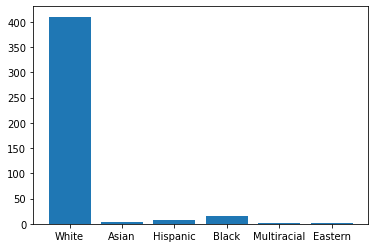

In [36]:
#Using Matplotlib to plot a bar which shows the race of oscar winner
import matplotlib.pyplot as plt
import numpy as np
x = np.array(["White", "Asian", "Hispanic", "Black","Multiracial","Eastern"])
y = np.array([410, 4, 8, 15, 2, 1])
plt.bar(x,y)
plt.show()

As You can see in the above bar plot, white people have won more oscars compared to the rest of the race. The count of white people winning the oscar is 410 where the next highest is just 15 which is the black.
So from this we can conclude that most oscars winner are definitely white.

Most Oscar winners are from USA

In [37]:
#getting the unique values in country
print(oscars_df['Country_of_birth'].unique())

[' Moldova' ' Scotland' 'USA' ' Italy' ' Alsace, France' ' Hungary'
 ' Austria' ' Turkey' ' England' ' Germany' ' Japan' ' Czechoslovakia'
 ' Canada' ' France' ' New Zealand' ' Taiwan' ' Switzerland'
 ' Yorkshire, England' ' Ukraine' ' Wales' ' Puerto Rico' ' Russia'
 ' New York City' ' Australia' ' Tuscany, Italy' ' Ireland' ' Mexico'
 ' Romania' ' Cambodia' ' Canary Islands' ' India' ' Sweden' ' Belgium'
 ' South Africa' ' Israel' ' Greece' ' Spain']


In [38]:
#using counter to get the occurences of the race
from collections import Counter
z=oscars_df['Country_of_birth']
Counter(z)

Counter({' Moldova': 2,
         ' Scotland': 3,
         'USA': 289,
         ' Italy': 6,
         ' Alsace, France': 3,
         ' Hungary': 2,
         ' Austria': 7,
         ' Turkey': 2,
         ' England': 57,
         ' Germany': 4,
         ' Japan': 5,
         ' Czechoslovakia': 2,
         ' Canada': 8,
         ' France': 6,
         ' New Zealand': 2,
         ' Taiwan': 2,
         ' Switzerland': 1,
         ' Yorkshire, England': 1,
         ' Ukraine': 1,
         ' Wales': 6,
         ' Puerto Rico': 3,
         ' Russia': 3,
         ' New York City': 1,
         ' Australia': 4,
         ' Tuscany, Italy': 1,
         ' Ireland': 2,
         ' Mexico': 3,
         ' Romania': 1,
         ' Cambodia': 1,
         ' Canary Islands': 1,
         ' India': 3,
         ' Sweden': 3,
         ' Belgium': 1,
         ' South Africa': 1,
         ' Israel': 1,
         ' Greece': 1,
         ' Spain': 1})

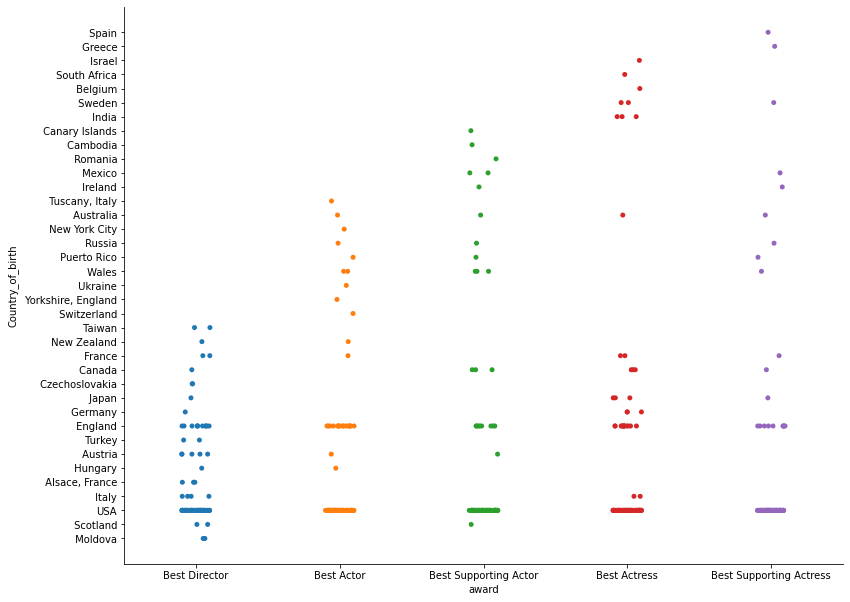

In [39]:
"""
We will display the country wise award winning category in following seaborn chart 
"""
import seaborn as sns
sns.catplot(x="award", y="Country_of_birth", data=oscars_df,height=8.27, aspect=11.7/8.27)
#oscars = oscars_df.assign(award=oscars_df['award'].astype('category'), 
#                       Country_of_birth=oscars_df['Country_of_birth'].astype('category'))
#oscars_df['award'] = oscars_df['award'].astype('category')
#oscars_df['Country_of_birth']=oscars_df['Country_of_birth'].astype('category')
#sns.violinplot(data=oscars_df, x='Country_of_birth', y='award')
#sns_plot = sns.violinplot(x='award', y='Country_of_birth', data=oscars)
#g = sns.catplot(x="award", y="Country_of_birth", kind="violin", inner=None, data=oscars_df,height=8.27, aspect=11.7/8.27)
#sns.swarmplot(x="award", y="Country_of_birth", color="k", size=3, data=oscars_df, ax=g.ax)

As you can see the above graph which was plotted using seaborn, USA has the most oscar winner in every award category. So we can conclude that the most oscar winners are from USA.

Best Directors tend to be older than best Actors or Actresses.

<AxesSubplot:xlabel='award', ylabel='award_age'>

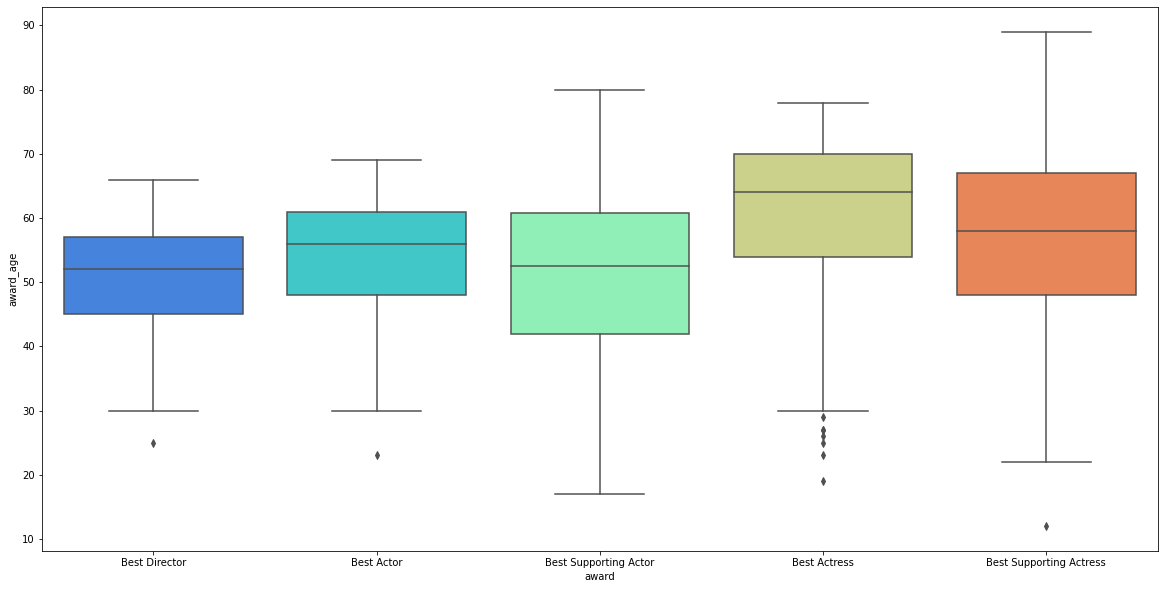

In [40]:
#using seaborn to plot the award and award age.
import seaborn as sns
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='award',y='award_age',data=oscars_df,palette='rainbow')

As you can see in the above boxplot that the age of Best Director is mostly between 45-55. where as for best actor it varies from 50-60 and for best actress the age goes from 55-70.
So we can conclude that the best Director are not older than the best actor and best actress.

In [41]:
oscars_df.head(10)

,race_ethnicity,year_of_award,award,Date_of_Birth,BirthYear,ldob,award_age,City_of_birth,Birth_State,Country_of_birth,Age_buckets,Age_by_decades
0,White,1927,Best Director,1895-09-30,1895,441,32,Chisinau,Moldova,Moldova,"(0, 35]",<35
1,White,1930,Best Director,1886-02-02,1886,441,44,Glasgow,Scotland,Scotland,"(35, 45]",35 to 45
2,White,1931,Best Director,1895-09-30,1895,441,36,Chisinau,Moldova,Moldova,"(35, 45]",35 to 45
3,White,1932,Best Director,1899-02-23,1899,441,33,Chicago,Il,USA,"(0, 35]",<35
4,White,1933,Best Director,1894-04-23,1894,441,39,Salt Lake City,Ut,USA,"(35, 45]",35 to 45
5,White,1934,Best Director,1886-02-02,1886,441,48,Glasgow,Scotland,Scotland,"(45, 55]",45 to 55
6,White,1935,Best Director,1897-05-18,1897,441,38,Bisacquino,Sicily,Italy,"(35, 45]",35 to 45
7,White,1936,Best Director,1894-02-01,1894,441,42,Cape Elizabeth,Me,USA,"(35, 45]",35 to 45
8,White,1937,Best Director,1897-05-18,1897,441,40,Bisacquino,Sicily,Italy,"(35, 45]",35 to 45
9,White,1938,Best Director,1898-10-03,1898,441,40,Los Angeles,Ca,USA,"(35, 45]",35 to 45


# Modelling

In [42]:
# Load the Drive helper and mount your Google Drive as a drive in the virtual machine
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [43]:
import os
os.chdir('/Users/gowthamnallathambi/Downloads')

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


from scipy import stats
from scipy.stats import kurtosis, skew
plt.style.use('seaborn-dark')

In [45]:
# LabelEncoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()   
for column_name in oscars_df.columns:
        if oscars_df[column_name].dtype == object:
            oscars_df[column_name] = le.fit_transform(oscars_df[column_name])
        else:
            pass   

In [46]:
oscars_df.tail()

,race_ethnicity,year_of_award,award,Date_of_Birth,BirthYear,ldob,award_age,City_of_birth,Birth_State,Country_of_birth,Age_buckets,Age_by_decades
436,5,2006,4,1971-03-07,1971,441,35,94,17,8,"(0, 35]",<35
437,5,2009,2,2056-10-20,2056,441,47,106,17,8,"(45, 55]",45 to 55
438,5,1977,3,2022-07-26,2022,441,45,27,32,36,"(35, 45]",35 to 45
439,5,1999,3,2028-08-31,2028,441,29,88,58,36,"(0, 35]",<35
440,5,1949,2,2006-08-05,2006,441,57,127,55,36,"(55, 100]",55<


In [47]:
oscars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 440
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   race_ethnicity    440 non-null    int64         
 1   year_of_award     440 non-null    int64         
 2   award             440 non-null    int64         
 3   Date_of_Birth     440 non-null    datetime64[ns]
 4   BirthYear         440 non-null    int64         
 5   ldob              440 non-null    int64         
 6   award_age         440 non-null    int64         
 7   City_of_birth     440 non-null    int64         
 8   Birth_State       440 non-null    int64         
 9   Country_of_birth  440 non-null    int64         
 10  Age_buckets       440 non-null    category      
 11  Age_by_decades    440 non-null    category      
dtypes: category(2), datetime64[ns](1), int64(9)
memory usage: 59.1 KB


In [48]:
#We are going to fit the logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [49]:
#Fitting the model using ethnicity, award age and birth country
independent = ['race_ethnicity','award_age','Country_of_birth']
X = oscars_df[independent]
y = oscars_df['award']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9,stratify = y)
print('train', len(X_train), 'test', len(X_test))

train 396 test 44


In [50]:
"""
Fitting the data using the x and y train values 
Model is learning the relationship between digits (x_train) and labels (y_train)
"""

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
#We'll print the score test value and corected value of logistic regression
print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

0.32323232323232326
0.2727272727272727


In [52]:
# conduct the X test
X_test

,race_ethnicity,award_age,Country_of_birth
185,5,65,5
93,5,66,36
319,5,50,36
245,5,30,1
68,5,57,36
293,5,64,8
207,5,37,8
61,5,53,16
362,5,73,36
76,5,30,9


In [53]:
"""
Predict the lables for the data using the information the model learned during the model training process
Let's print the prediction of X test using logistic regression
Making predictions on the entire test
"""
print(logreg.predict(X_test))

[1 1 0 2 1 1 2 2 1 2 3 1 1 1 0 0 2 1 3 3 2 1 1 2 3 3 1 1 1 3 1 1 1 1 3 2 0
 1 2 1 1 0 1 1]


In [54]:
#calculate and print the accuracy score for the test
score = logreg.score(X_test, y_test)
print(score)

0.2727272727272727


In [55]:
# generate evaluation metrics
# Calculating the accuracy test using y test and x test values 
from sklearn import metrics

print ("Accuracy ON TEST SET :", metrics.accuracy_score(y_test, logreg.predict(X_test)))

Accuracy ON TEST SET : 0.2727272727272727


This is concluded that our accuracy value is 15.9%

In [56]:
y_predicted = logreg.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1, 6, 1, 1, 0],
       [1, 6, 1, 1, 0],
       [1, 3, 3, 2, 0],
       [1, 2, 3, 2, 0],
       [1, 6, 1, 1, 0]])

The above confusion matrix is not visually super informative or visually appealing

Text(0.5, 1.0, 'Accuracy Score: 0.2727272727272727')

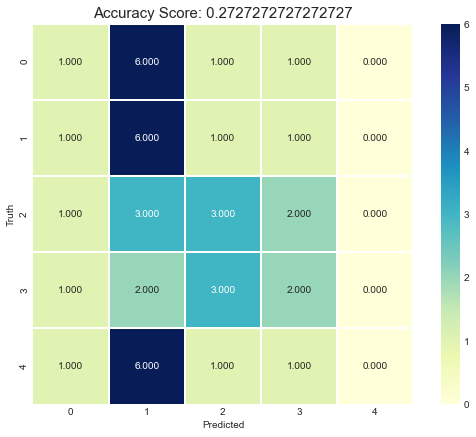

In [58]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [90]:
from sklearn import feature_selection, linear_model, model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [91]:

clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print("1. Mean hits: {}".format(np.mean(predicted==y_test)))
print("2. Accuracy score: {}".format(metrics.accuracy_score(y_test, predicted)))
print("3. Test score: {}".format(clf.score(X_test, y_test)))
# 1., 2., 3. compute the same things.
scores = model_selection.cross_val_score(clf, X, y, scoring='accuracy', cv=8)
print("Cross validation mean scores: {}".format(scores.mean()))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

1. Mean hits: 0.0
2. Accuracy score: 0.0
3. Test score: 0.0
Cross validation mean scores: 0.28863636363636364


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC = nan


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


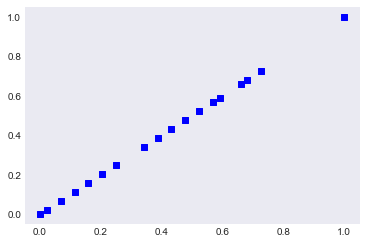

In [92]:
prob = np.array(clf.predict_proba(X_test)[:, 1])
y_test += 1
fpr, sensitivity, _ = metrics.roc_curve(y_test, prob, pos_label=2)
print("AUC = {}".format(metrics.auc(fpr, sensitivity)))
plt.scatter(fpr, fpr, c='b', marker='s')
plt.scatter(fpr, sensitivity, c='r', marker='o')
plt.show()

In [97]:
#Improving the model by classifying the data
#We'll use the randomforest classifier 
crf = RandomForestClassifier(n_jobs=-1, n_estimators=400, min_samples_leaf=5, \
                             max_depth = 30, oob_score=True)
crf.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_estimators=400,
                       n_jobs=-1, oob_score=True)

In [98]:
# Defining random forest classifier 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_estimators=400,
                       n_jobs=-1, oob_score=True)

In [99]:
# Printing the accuracy score for training data, test data and Oob score
print("Accuracy score for training data is: {:4.3f}".format(crf.score(X_train, y_train)))
print("Accuracy score for test data: {:4.3f}".format(crf.score(X_test, y_test)))
print("The Oob score is: {:4.3f}".format(crf.oob_score_))

Accuracy score for training data is: 0.482
Accuracy score for test data: 0.000
The Oob score is: 0.313


In [100]:
# Making the crossvalidation acuracy check score between logistic regression and random forest
crossvalidation = KFold(10, shuffle=True)
score1=cross_val_score(clf, X, y,scoring='accuracy',cv=crossvalidation,n_jobs=-1)
print("X valiation score for Logistic regression is: {:5.4f}".format(np.mean(score1)))
score2=cross_val_score(crf, X, y,scoring='accuracy',cv=crossvalidation,n_jobs=-1)
print("X validation score for Random Forest: {:5.4f}".format(np.mean(score2)))

X valiation score for Logistic regression is: 0.2818
X validation score for Random Forest: 0.3273


In [101]:
score1

array([0.43181818, 0.29545455, 0.29545455, 0.27272727, 0.27272727,
       0.25      , 0.29545455, 0.31818182, 0.18181818, 0.20454545])

In [102]:
score2

array([0.31818182, 0.31818182, 0.27272727, 0.45454545, 0.43181818,
       0.31818182, 0.34090909, 0.36363636, 0.25      , 0.20454545])

# K-Means Clustering

In [103]:
oscars_df.head()

,race_ethnicity,year_of_award,award,Date_of_Birth,BirthYear,ldob,award_age,City_of_birth,Birth_State,Country_of_birth,Age_buckets,Age_by_decades
0,5,1927,2,1895-09-30,1895,441,32,29,56,19,"(0, 35]",<35
1,5,1930,2,1886-02-02,1886,441,44,59,76,25,"(35, 45]",35 to 45
2,5,1931,2,1895-09-30,1895,441,36,29,56,19,"(35, 45]",35 to 45
3,5,1932,2,1899-02-23,1899,441,33,27,32,36,"(0, 35]",<35
4,5,1933,2,1894-04-23,1894,441,39,166,89,36,"(35, 45]",35 to 45


In [104]:
oscars_df.head()

,race_ethnicity,year_of_award,award,Date_of_Birth,BirthYear,ldob,award_age,City_of_birth,Birth_State,Country_of_birth,Age_buckets,Age_by_decades
0,5,1927,2,1895-09-30,1895,441,32,29,56,19,"(0, 35]",<35
1,5,1930,2,1886-02-02,1886,441,44,59,76,25,"(35, 45]",35 to 45
2,5,1931,2,1895-09-30,1895,441,36,29,56,19,"(35, 45]",35 to 45
3,5,1932,2,1899-02-23,1899,441,33,27,32,36,"(0, 35]",<35
4,5,1933,2,1894-04-23,1894,441,39,166,89,36,"(35, 45]",35 to 45


In [60]:
# import the KMeans cluster
from sklearn.cluster import KMeans

In [61]:
# We're calculating the 4 clusters
kmeans = KMeans(n_clusters=4)

In [62]:
# define our indicator list
metric_list = ['race_ethnicity','award_age','Country_of_birth','award']

# select only the columns we need
indicator_df = oscars_df[metric_list]

display(indicator_df.head())
# remove such as zero or missing values
indicator_df = indicator_df[indicator_df[metric_list] != 0]
indicator_df = indicator_df.dropna(how ='any')


display(indicator_df.head())

,race_ethnicity,award_age,Country_of_birth,award
0,5,32,19,2
1,5,44,25,2
2,5,36,19,2
3,5,33,36,2
4,5,39,36,2


,race_ethnicity,award_age,Country_of_birth,award
0,5.0,32,19.0,2.0
1,5.0,44,25.0,2.0
2,5.0,36,19.0,2.0
3,5.0,33,36.0,2.0
4,5.0,39,36.0,2.0


In [63]:
# set the index
indicator_df = indicator_df.set_index('award')

#convert dtype to float
indicator_df = indicator_df.astype('float')

indicator_df.head()

,race_ethnicity,award_age,Country_of_birth
award,,,
2.0,5.0,32.0,19.0
2.0,5.0,44.0,25.0
2.0,5.0,36.0,19.0
2.0,5.0,33.0,36.0
2.0,5.0,39.0,36.0


In [64]:
kmeans = KMeans(n_clusters=4)

In [65]:
kmeans.fit(indicator_df)

KMeans(n_clusters=4)

In [66]:
kmeans.cluster_centers_

array([[ 4.77108434, 38.63855422, 35.25301205],
       [ 4.75409836, 62.44262295,  9.91803279],
       [ 4.82926829, 62.77439024, 35.65853659],
       [ 4.89189189, 35.54054054,  9.05405405]])

In [67]:
kmeans.labels_

array([3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 0, 1, 0, 3, 2, 3, 1, 2, 0, 3, 1, 0, 3, 1, 1, 2, 2,
       0, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 0, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 1, 0, 1, 2, 2, 3, 1, 0, 0, 0, 3, 0, 3, 1, 0, 3, 0, 0, 0, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1,
       2, 2, 2, 0, 0, 3, 0, 2, 3, 2, 2, 0, 0, 2, 0, 2, 3, 2, 2, 0, 3, 0,
       2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 3, 1, 3, 0, 2, 0, 2, 0, 1, 3, 0,
       0, 3, 0, 0, 2, 3, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0,
       2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       3, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 3, 3, 3, 2, 3,
       0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       1, 2, 2, 0, 2, 2, 3, 2, 2, 0, 2, 1, 2, 2, 2,

In [68]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

In [69]:
dict_data = dict(zip(unique, counts))
dict_data

{0: 83, 1: 61, 2: 164, 3: 37}

In [70]:
indicator_df["cluster"] = kmeans.labels_

# 3D Clusters

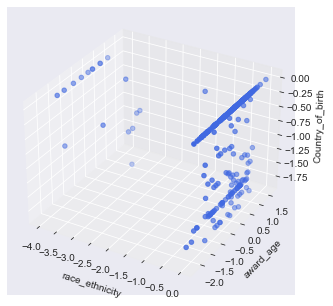

In [76]:
# Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# define each scaler 
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
Rob_scaler = RobustScaler()

# scale the data
X_train_minmax = min_max_scaler.fit_transform(indicator_df)
X_train_standard = std_scaler.fit_transform(indicator_df)
X_train_rob = Rob_scaler.fit_transform(indicator_df)


# define our figure
fig = plt.figure()
ax = Axes3D(fig)

# define the x, y and z axis

x = X_train_rob[:,0]
y = X_train_rob[:,1]
z = X_train_rob[:,2]

# define axis labels
column_names = indicator_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

# define the markers and color
ax.scatter(x,y,z, c = 'royalBlue', marker = 'o')

plt.show()



----------------------------------------------------------------------------------------------------


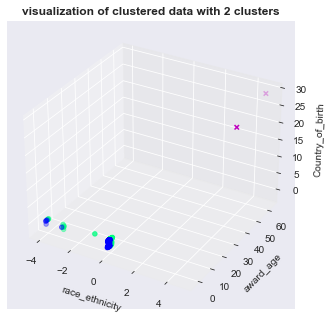

----------------------------------------------------------------------------------------------------


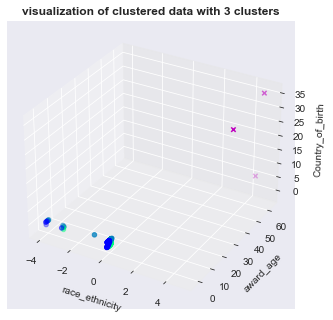

----------------------------------------------------------------------------------------------------


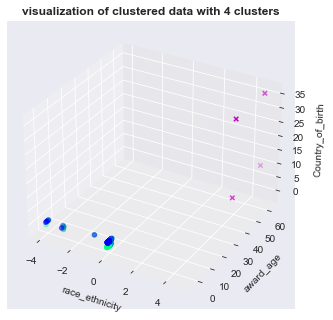

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
clusters = [2, 3, 4]

for cluster in clusters:
    
    print('-'*100)
    
    # create an instance of the kmeans model
    kmeans = KMeans(n_clusters = cluster, random_state = 0).fit(indicator_df)
    
    # define our cluster
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]
    C3 = cluster_centers[:, 2]
    
    # define our figure
    fig = plt.figure()
    ax = Axes3D(fig)

    # define the x, y and z axis

    x = X_train_rob[:,0]
    y = X_train_rob[:,1]
    z = X_train_rob[:,2]

    # define axis labels
    column_names = indicator_df.columns
    ax.set_xlabel(column_names[0])
    ax.set_ylabel(column_names[1])
    ax.set_zlabel(column_names[2])

    # define the markers and color
    ax.scatter(x,y,z, c =kmeans.labels_.astype(float), cmap = 'winter', marker = 'o')
    ax.scatter(C1,C2,C3, marker = 'x', color = 'm')
    plt.title("visualization of clustered data with {} clusters". format(cluster), fontweight='bold')

    plt.show()



# 2D Clusters with PCA

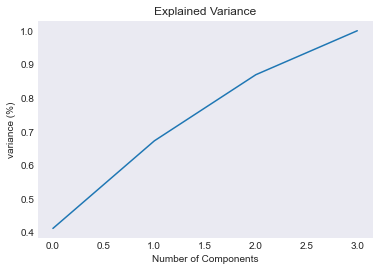

In [73]:
from sklearn.decomposition import PCA
import numpy as np

# pass throughour scaled data
pca = PCA(). fit(X_train_rob)

# plot the cumulative summation of the variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# deifine the title and labels
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained Variance')
plt.show()

In [74]:
# creating PCA modified dataset
pca_dataset = PCA(n_components = 3).fit(X_train_rob).transform(X_train_rob)

# store it in a new data frame
pca_dataset = pd.DataFrame(data =pca_dataset, columns = ['component 1', 'component 2','component 3'])

pca_dataset.head()

,component 1,component 2,component 3
0,-1.164044,-0.092640,1.415125
1,1.457585,-0.379323,0.216081
2,-1.230361,-0.082905,1.260524
3,1.729291,-0.383137,0.290105
4,1.629816,-0.368535,0.058204


----------------------------------------------------------------------------------------------------


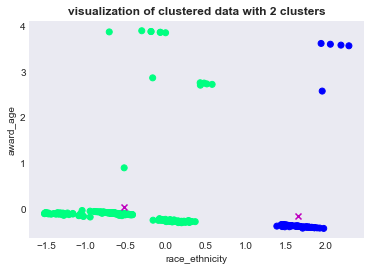

----------------------------------------------------------------------------------------------------


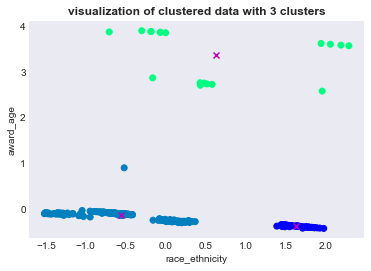

In [75]:

clusters = [2,3]

for cluster in clusters:
    
    print('-'*100)
    
    # create an instance of the kmeans model
    kmeans = KMeans(n_clusters = cluster, random_state = 0).fit(pca_dataset)
    
    # define our cluster
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]

    
    # define our figure
    fig = plt.figure()
   

    # define the x and y axis

    x = pca_dataset['component 1']
    y = pca_dataset['component 2']
    

    # define axis labels
    column_names = indicator_df.columns
    plt.xlabel(column_names[0])
    plt.ylabel(column_names[1])
   

    # define the markers and color
    plt.scatter(x,y, c =kmeans.labels_.astype(float), cmap = 'winter', marker = 'o')
    plt.scatter(C1,C2, marker = 'x', color = 'm')
    plt.title("visualization of clustered data with {} clusters". format(cluster), fontweight='bold')

    plt.show()
